Understanding the dataset

In [2]:
import pandas as pd

# Load the dataset
file_path = 'BarisalFlood.csv'  # Replace with the actual path to your dataset
df = pd.read_csv(file_path)

# Explore the dataset
print("Dataset Overview:")
print(df.head())  # Display the first few rows of the dataset

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics of numerical columns
print("\nSummary Statistics:")
print(df.describe())


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


Dataset Overview:
   Sl Station_Names  Year  Month  Max_Temp  Min_Temp  Rainfall  \
0   0       Barisal  1949      1      29.4      12.3         0   
1   1       Barisal  1949      2      33.9      15.2         9   
2   2       Barisal  1949      3      36.7      20.2         8   
3   3       Barisal  1949      4      33.9      23.9       140   
4   4       Barisal  1949      5      35.6      25.0       217   

   Relative_Humidity  Wind_Speed  Cloud_Coverage  Bright_Sunshine  \
0                 68    0.453704             0.6         7.831915   
1                 63    0.659259             0.9         8.314894   
2                 59    1.085185             1.5         8.131915   
3                 71    1.772222             3.9         8.219149   
4                 76    1.703704             4.1         7.046809   

   Station_Number     X_COR     Y_COR  LATITUDE  LONGITUDE  ALT   Period  \
0           41950  536809.8  510151.9      22.7      90.36    4  1949.01   
1           41950 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sl                 780 non-null    int64  
 1   Station_Names      780 non-null    object 
 2   Year               780 non-null    int64  
 3   Month              780 non-null    int64  
 4   Max_Temp           780 non-null    float64
 5   Min_Temp           780 non-null    float64
 6   Rainfall           780 non-null    int64  
 7   Relative_Humidity  780 non-null    int64  
 8   Wind_Speed         780 non-null    float64
 9   Cloud_Coverage     780 non-null    float64
 10  Bright_Sunshine    780 non-null    float64
 11  Station_Number     780 non-null    int64  
 12  X_COR              780 non-null    float64
 13  Y_COR              780 non-null    float64
 14  LATITUDE           780 non-null    float64
 15  LONGITUDE          780 non-null    float64
 16  ALT                780 non

In [4]:
print(df)

      Sl Station_Names  Year  Month  Max_Temp  Min_Temp  Rainfall  \
0      0       Barisal  1949      1      29.4      12.3         0   
1      1       Barisal  1949      2      33.9      15.2         9   
2      2       Barisal  1949      3      36.7      20.2         8   
3      3       Barisal  1949      4      33.9      23.9       140   
4      4       Barisal  1949      5      35.6      25.0       217   
..   ...           ...   ...    ...       ...       ...       ...   
775  775       Barisal  2013      8      34.0      26.2       398   
776  776       Barisal  2013      9      35.0      26.0       312   
777  777       Barisal  2013     10      34.2      24.4       181   
778  778       Barisal  2013     11      32.2      17.7         0   
779  779       Barisal  2013     12      29.5      14.2         0   

     Relative_Humidity  Wind_Speed  Cloud_Coverage  Bright_Sunshine  \
0                   68    0.453704             0.6         7.831915   
1                   63    0.6

Data preprocessing

In [13]:
df.drop(columns='Station_Names',inplace=True)
df.drop(columns='Station_Number',inplace=True)
df.drop(columns='X_COR',inplace=True)
df.drop(columns='Y_COR',inplace=True)
df.drop(columns='LATITUDE',inplace=True)
df.drop(columns='LONGITUDE',inplace=True)
df.drop(columns='ALT',inplace=True)
df['Flood?'] = df['Flood?'].fillna(0)
encoder=LabelEncoder()
df['Sl']=encoder.fit_transform(df['Sl'])

KeyError: "['Station_Names'] not found in axis"

In [6]:
df.describe


<bound method NDFrame.describe of       Sl  Year  Month  Max_Temp  Min_Temp  Rainfall  Relative_Humidity  \
0      0  1949      1      29.4      12.3         0                 68   
1      1  1949      2      33.9      15.2         9                 63   
2      2  1949      3      36.7      20.2         8                 59   
3      3  1949      4      33.9      23.9       140                 71   
4      4  1949      5      35.6      25.0       217                 76   
..   ...   ...    ...       ...       ...       ...                ...   
775  775  2013      8      34.0      26.2       398                 88   
776  776  2013      9      35.0      26.0       312                 88   
777  777  2013     10      34.2      24.4       181                 88   
778  778  2013     11      32.2      17.7         0                 81   
779  779  2013     12      29.5      14.2         0                 82   

     Wind_Speed  Cloud_Coverage  Bright_Sunshine   Period  Flood?  
0      0.

In [10]:
df.columns

Index(['Year', 'Month', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine',
       'Period', 'Flood?'],
      dtype='object')

Categorical label encoding

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Encode 'Year', 'Month', and 'Period'
label_encoder = LabelEncoder()
df['Year'] = label_encoder.fit_transform(df['Year'])
df['Month'] = label_encoder.fit_transform(df['Month'])
df['Period'] = label_encoder.fit_transform(df['Period'])

# 'Sl' seems like an identifier or index, so it might not be needed for encoding.
# If it's not relevant for modeling, you can drop it.
df = df.drop('Sl', axis=1)

# For the target variable 'Flood?', if it's binary (yes/no), you can encode it as well
df['Flood?'] = label_encoder.fit_transform(df['Flood?'])

# Display the processed DataFrame
print(df.head())


   Year  Month  Max_Temp  Min_Temp  Rainfall  Relative_Humidity  Wind_Speed  \
0     0      0      29.4      12.3         0                 68    0.453704   
1     0      1      33.9      15.2         9                 63    0.659259   
2     0      2      36.7      20.2         8                 59    1.085185   
3     0      3      33.9      23.9       140                 71    1.772222   
4     0      4      35.6      25.0       217                 76    1.703704   

   Cloud_Coverage  Bright_Sunshine  Period  Flood?  
0             0.6         7.831915       0       0  
1             0.9         8.314894       1       0  
2             1.5         8.131915       2       0  
3             3.9         8.219149       3       0  
4             4.1         7.046809       4       0  


Creating a graph

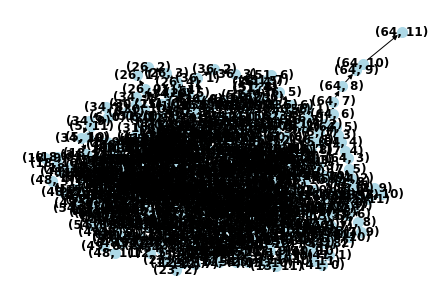

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed temporal graph
G = nx.DiGraph()

# Add nodes representing combinations of 'Year' and 'Month'
nodes = [(year, month) for year, month in zip(df['Year'], df['Month'])]
G.add_nodes_from(nodes)

# Add edges representing temporal order
sorted_dates = sorted(zip(df['Year'], df['Month']))
edges = [(sorted_dates[i], sorted_dates[i + 1]) for i in range(len(sorted_dates) - 1)]
G.add_edges_from(edges)

# Add node attributes
node_attributes = df.set_index(['Year', 'Month']).to_dict(orient='index')
nx.set_node_attributes(G, node_attributes)

# Visualize the graph (optional)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=100, node_color='lightblue')
plt.show()


Train test split

In [9]:
from sklearn.model_selection import train_test_split

# Assuming 'Flood?' is the target variable
X = df.drop('Flood?', axis=1)  # Features
y = df['Flood?']  # Target variable

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the target variables to ensure they are 2D arrays
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (624, 10)
Shape of X_test: (156, 10)
Shape of y_train: (624, 1)
Shape of y_test: (156, 1)


Model implementation

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
import networkx as nx

# Assuming 'Flood?' is the target variable
X = df.drop('Flood?', axis=1)  # Features
y = df['Flood?']  # Target variable

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the training set to a temporal graph
G_train = nx.DiGraph()
nodes_train = [(year, month) for year, month in zip(X_train['Year'], X_train['Month'])]
G_train.add_nodes_from(nodes_train)
sorted_dates_train = sorted(zip(X_train['Year'], X_train['Month']))
edges_train = [(sorted_dates_train[i], sorted_dates_train[i + 1]) for i in range(len(sorted_dates_train) - 1)]
G_train.add_edges_from(edges_train)

# Convert the graph to PyTorch Geometric Data
edge_index_train = torch.tensor(list(G_train.edges)).contiguous().view(2, -1)
x_train = torch.tensor(X_train.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float).view(-1, 1)  # Reshape to ensure it's a column vector

data_train = Data(x=x_train, edge_index=edge_index_train, y=y_train)


# Define the GNN model
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# Instantiate the GNN model
input_dim = x_train.size(1)  # Number of features for each node
hidden_dim = 64
output_dim = 1  # Assuming 'Flood?' is a binary classification task

model = GNNModel(input_dim, hidden_dim, output_dim)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
def train_model(model, data, optimizer, criterion, epochs=100):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(data).squeeze()  # Squeeze to remove unnecessary dimensions
        loss = criterion(output, data.y.view(-1))
        loss.backward()
        optimizer.step()

train_model(model, data_train, optimizer, criterion)


In [17]:
# Convert the test set to a temporal graph
G_test = nx.DiGraph()
nodes_test = [(year, month) for year, month in zip(X_test['Year'], X_test['Month'])]
G_test.add_nodes_from(nodes_test)
sorted_dates_test = sorted(zip(X_test['Year'], X_test['Month']))
edges_test = [(sorted_dates_test[i], sorted_dates_test[i + 1]) for i in range(len(sorted_dates_test) - 1)]
G_test.add_edges_from(edges_test)

# Convert the graph to PyTorch Geometric Data for test set
edge_index_test = torch.tensor(list(G_test.edges)).contiguous().view(2, -1)
x_test = torch.tensor(X_test.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.float).view(-1, 1)  # Reshape to ensure it's a column vector

data_test = Data(x=x_test, edge_index=edge_index_test, y=y_test)

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_pred = model(data_test).squeeze()

# Perform evaluation (use appropriate metrics based on your task)
# For binary classification, you might want to use metrics like accuracy, precision, recall, F1 score, etc.


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Convert predictions to binary (0 or 1) based on a threshold (e.g., 0.5 for probability output)
y_pred_binary = (y_pred > 0.5).float()

# Evaluate the model
accuracy = accuracy_score(y_test.numpy(), y_pred_binary.numpy())
precision = precision_score(y_test.numpy(), y_pred_binary.numpy())
recall = recall_score(y_test.numpy(), y_pred_binary.numpy())
f1 = f1_score(y_test.numpy(), y_pred_binary.numpy())
roc_auc = roc_auc_score(y_test.numpy(), y_pred.numpy())

conf_matrix = confusion_matrix(y_test.numpy(), y_pred_binary.numpy())

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8333
Precision: 0.8250
Recall: 0.6346
F1 Score: 0.7174
ROC AUC Score: 0.8759
Confusion Matrix:
[[97  7]
 [19 33]]


Visualization

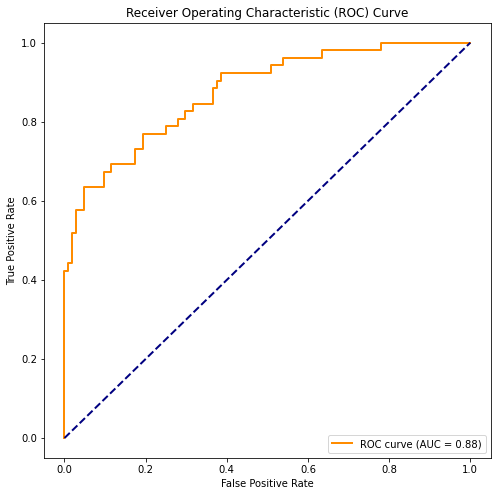

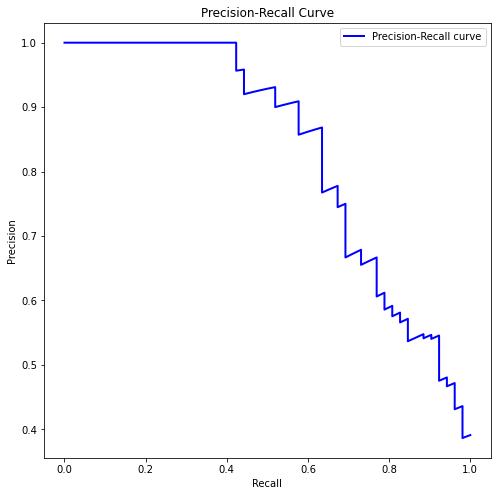

In [19]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test.numpy(), y_pred.numpy())
roc_auc = auc(fpr, tpr)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test.numpy(), y_pred.numpy())

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()
